# Avocado Price Prediction (Time Series with Prophet)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


## Import/Read Data

In [2]:
# Read avocado CSV
avocado_df = pd.read_csv('avocado_dataset.csv')
# Show First Rows
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


## Visualizing Content of Dataset (Visual Analysis)

In [3]:
# Sort Table In-Place by Date
avocado_df.sort_values("Date", inplace=True)
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


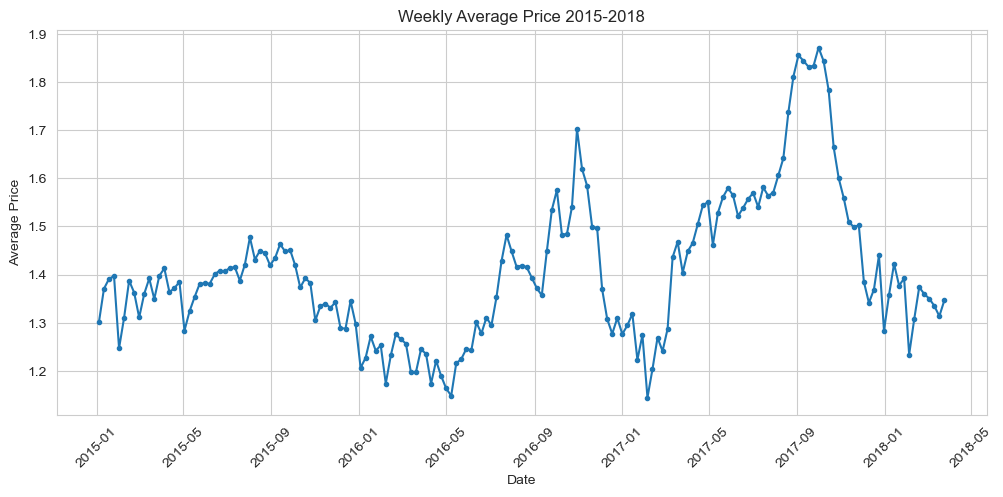

In [4]:
# Show Date vs Average Price of Avocado
# (Data will be cluttered)
grouped_dates = avocado_df.copy()
grouped_dates['Date'] = pd.to_datetime(grouped_dates['Date'])
dg = grouped_dates.groupby(pd.Grouper(key='Date', freq='1W')).mean() # groupby each 1 month
#dg.index = dg.index.strftime('%B')
dg.keys()
plt.figure(figsize=(12,5))
plt.plot(dg['AveragePrice'],'.-')
plt.xticks(rotation = 45)
plt.title('Weekly Average Price 2015-2018')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

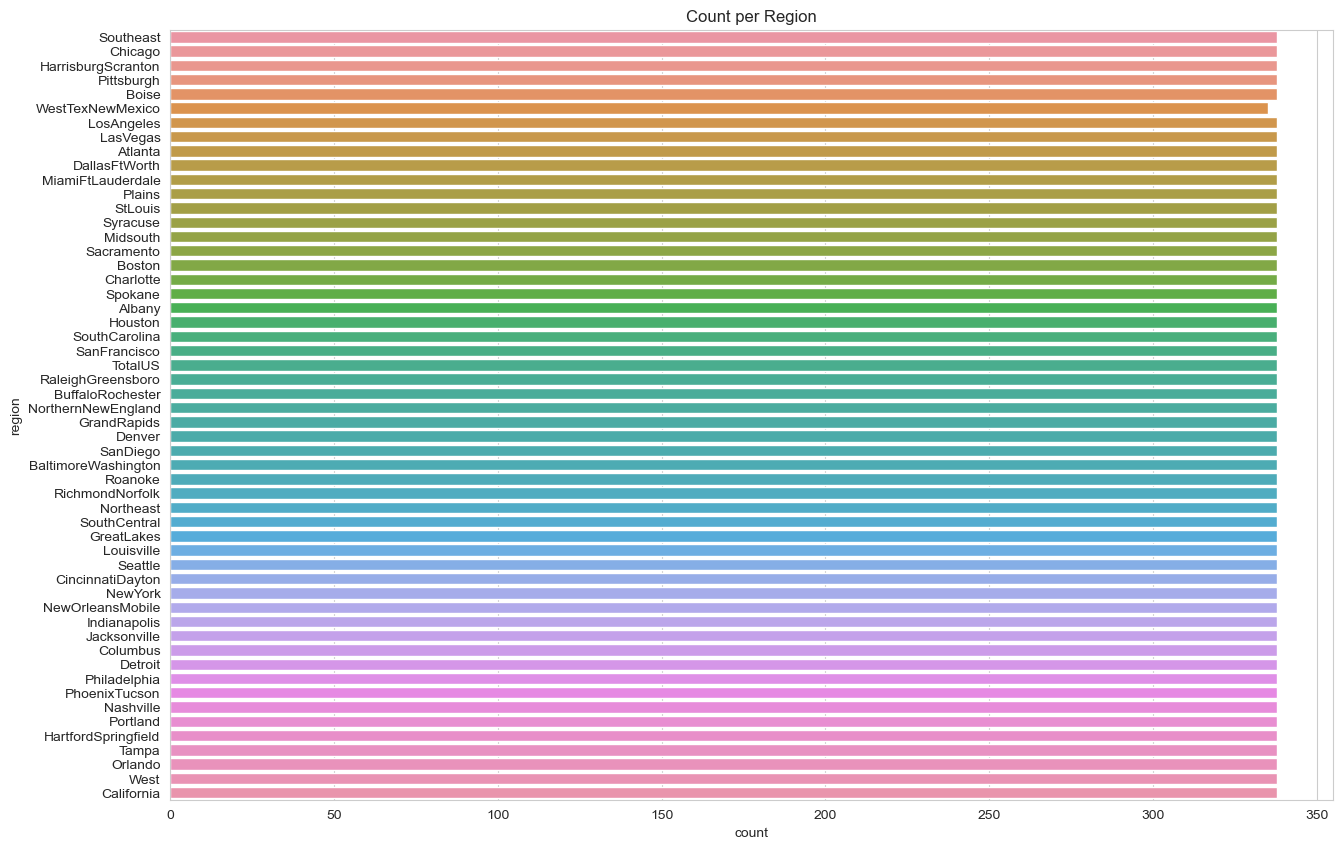

In [5]:
# Count Data for the number of Regions
plt.figure(figsize=(15,10))
sns.countplot(y='region', data=avocado_df)
plt.title('Count per Region')
plt.show()

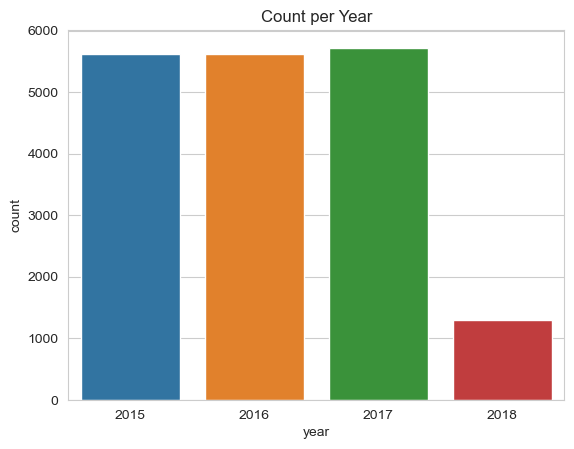

In [6]:
# Count of Avocado Tons per Year
plt.figure()
sns.countplot(x='year', data=avocado_df)
plt.title('Count per Year')
plt.show()

## Use Prophet

In [7]:
# Extract Data for Prophet Operations
avocado_prophet_df = avocado_df[['Date', 'AveragePrice']]
avocado_prophet_df.head()

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [8]:
# Rename columns to df and y for Prophet
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})
avocado_prophet_df.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [9]:
# Create Instance of Prophet
meta = Prophet(weekly_seasonality=False, daily_seasonality=False)
# Train model with our Data
meta.fit(avocado_prophet_df)

In [10]:
# Forecast for Future Trends
# 1 year = 365 days
future = meta.make_future_dataframe(periods=365)
forecast = meta.predict(future)

In [11]:
# New Rows for 2019 are shown in the Tail
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
529,2019-03-21,1.164538,0.584147,1.602823,0.981037,1.340922,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,-0.086418,0.0,0.0,0.0,1.078120
530,2019-03-22,1.163813,0.561154,1.643460,0.979409,1.340682,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,-0.084748,0.0,0.0,0.0,1.079065
531,2019-03-23,1.163088,0.543901,1.541859,0.977780,1.340503,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,-0.082805,0.0,0.0,0.0,1.080283
532,2019-03-24,1.162363,0.549852,1.606113,0.976152,1.340955,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,-0.080608,0.0,0.0,0.0,1.081756
533,2019-03-25,1.161639,0.577922,1.578925,0.974831,1.341407,-0.078184,-0.078184,-0.078184,-0.078184,-0.078184,-0.078184,0.0,0.0,0.0,1.083455


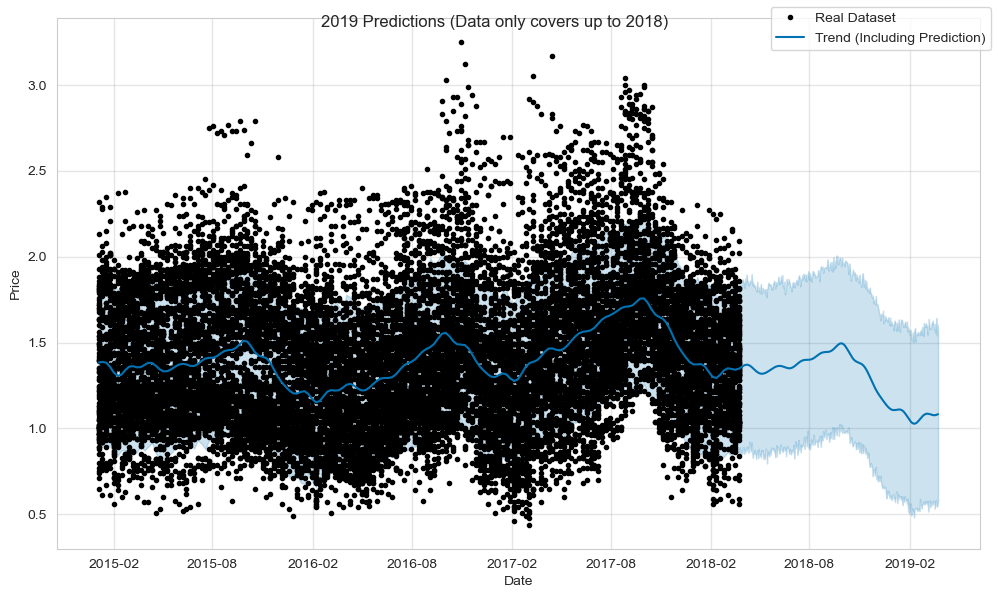

In [12]:
# Plot
figure = meta.plot(forecast, xlabel='Date', ylabel='Price')
figure.suptitle('2019 Predictions (Data only covers up to 2018)')
figure.legend(['Real Dataset','Trend (Including Prediction)'])

Text(0.5, 1.0, 'Predicted Year (2019) Seasonal Variations')

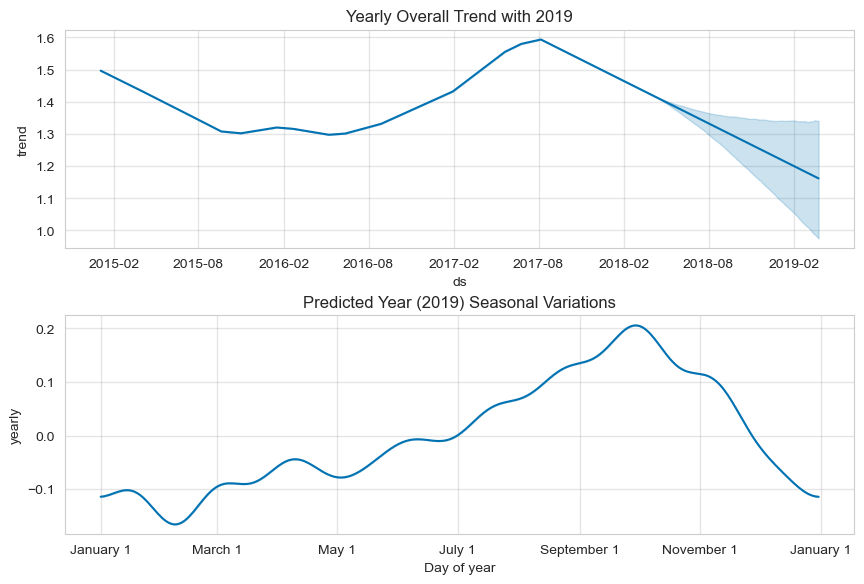

In [13]:
# Plot seasonality
figure = meta.plot_components(forecast)
figure.tight_layout(pad=2)
ax_list = figure.axes
ax_list[0].set_title('Yearly Overall Trend with 2019')
ax_list[1].set_title('Predicted Year (2019) Seasonal Variations')

## Do Predictions per Region

In [14]:
# Read Data
avocado_df = pd.read_csv('avocado_dataset.csv')
# Extract Subset of Data
avocado_sample_df = avocado_df[avocado_df['region'] == 'West']
avocado_sample_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2704,0,2015-12-27,0.83,5291979.63,2038443.68,1717599.45,125254.82,1410681.68,838267.79,567269.76,5144.13,conventional,2015,West
2705,1,2015-12-20,0.88,4737649.03,2017331.24,1314711.00,130849.60,1274757.19,843691.13,417746.45,13319.61,conventional,2015,West
2706,2,2015-12-13,0.85,4899439.92,1798995.46,1596329.01,134101.62,1370013.83,851506.76,517936.19,570.88,conventional,2015,West
2707,3,2015-12-06,0.75,6202513.84,2097720.52,2051392.83,107568.34,1945832.15,1360760.83,582846.33,2224.99,conventional,2015,West
2708,4,2015-11-29,0.99,3719603.21,1461861.54,1216811.00,104219.76,936710.91,688674.00,247318.15,718.76,conventional,2015,West


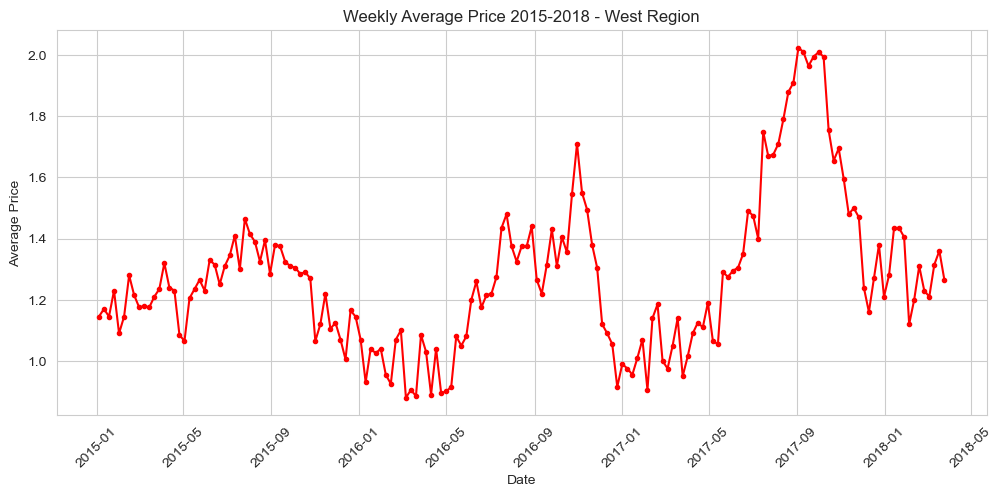

In [15]:
# Sort By Date
avocado_sample_df = avocado_sample_df.sort_values('Date')
# Weekly Average Plot
grouped_dates_sample = avocado_sample_df.copy()
grouped_dates_sample['Date'] = pd.to_datetime(grouped_dates_sample['Date'])
dg_sample = grouped_dates_sample.groupby(pd.Grouper(key='Date', freq='1W')).mean() # groupby each 1 month
#dg.index = dg.index.strftime('%B')
plt.figure(figsize=(12,5))
plt.plot(dg_sample['AveragePrice'],'r.-')
plt.xticks(rotation = 45)
plt.title('Weekly Average Price 2015-2018 - West Region')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

In [16]:
# Prediction for Region
# Extract Data for Prophet Operations
avocado_prophet_sample_df = avocado_sample_df[['Date', 'AveragePrice']]

# Change Name of Cols
# Rename columns to df and y for Prophet
avocado_prophet_sample_df = avocado_prophet_sample_df.rename(columns={'Date':'ds','AveragePrice':'y'})

# Create Instance of Prophet
meta_sample = Prophet(weekly_seasonality=False, daily_seasonality=False)
# Train model with our Data
meta_sample.fit(avocado_prophet_sample_df)

# Forecast for Future Trends
# 1 year = 365 days
future_sample = meta_sample.make_future_dataframe(periods=365)
forecast_sample = meta_sample.predict(future_sample)

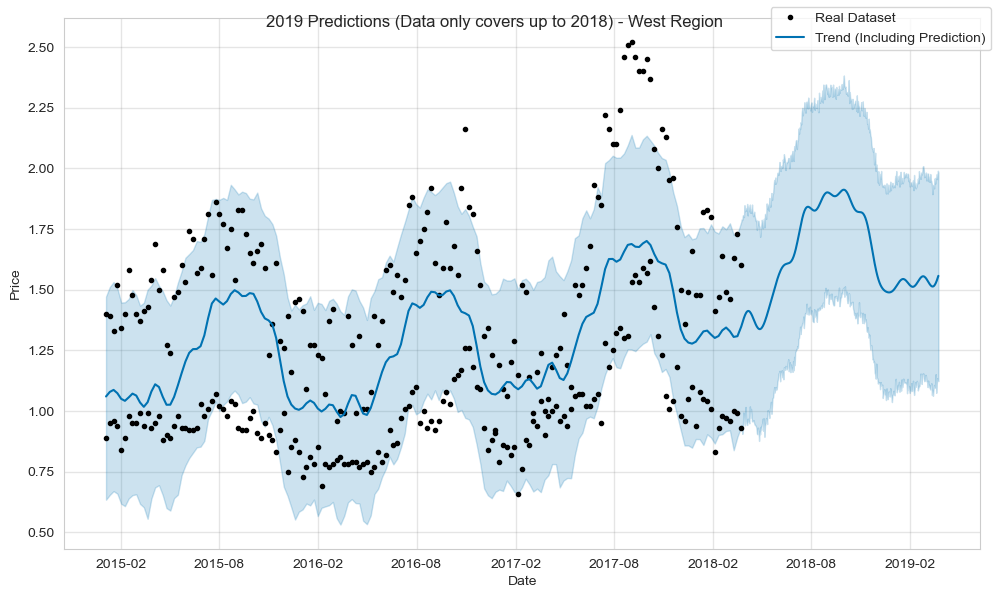

In [17]:
# Plot
figure = meta_sample.plot(forecast_sample, xlabel='Date', ylabel='Price')
figure.suptitle('2019 Predictions (Data only covers up to 2018) - West Region')
figure.legend(['Real Dataset','Trend (Including Prediction)'])

Text(0.5, 1.0, 'Predicted Year (2019) Seasonal Variations - West Region')

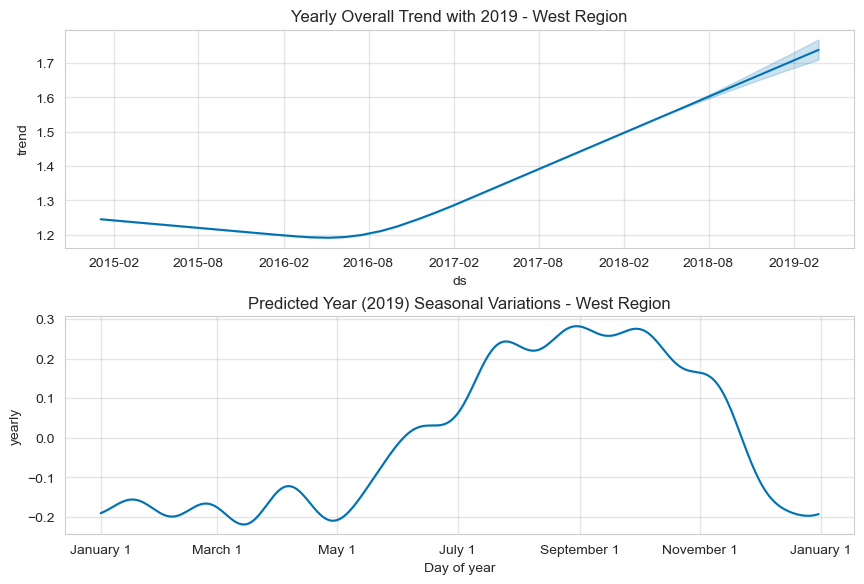

In [18]:
# Plot seasonality
figure = meta_sample.plot_components(forecast_sample)
figure.tight_layout(pad=2)
ax_list = figure.axes
ax_list[0].set_title('Yearly Overall Trend with 2019 - West Region')
ax_list[1].set_title('Predicted Year (2019) Seasonal Variations - West Region')